# Domain model for Data Engineering
* includes all the major steps of reasoning for feature selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from functools import reduce

sns.set_style('whitegrid')

In [2]:
# import master dataset (text processed and feature engineered applications)
df = pd.read_csv('../ApplicantScore_Data/Data_Master.csv')
df.head()

,Unnamed: 0,hashed_application_id,hashed_candidate_id,linkedin_available,website_available,github_available,program_short,location_short,year,session,...,terraform,threat analys,version control,wireshark,PhD,preferred_study_area_DS,preferred_study_area_SEC,preferred_study_area_DC,preferred_study_area_DE,preferred_study_area_DO
0,0,e6257449bb6b2ecb86a042b896e38361,150f404526c29501a371238154700e6d,1,0,0,DE,SV,2019,B,...,0.0,0.0,0.0,0.0,0,1,1,1,1,0
1,1,fd8eb1133a75d9c0b334f6899cd228b9,f2b1a8bd28c2391224c002b9c80f6143,0,0,0,DS,TO,2019,C,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,2,1d270c12d25615282e555adb23006cc5,f8078d8d9e3259d417b4c133fda72ab5,1,0,1,AI,NY,2019,A,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,3,510845ec68d29fd85d5a62d8bf2ecfe3,36c0205f303e4744ab54464830b3ae11,1,0,0,DE,SV,2019,B,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,4,18039f4fd215bfab0c6161b3094b623c,6ca10dafb8206133608a6f67a23744f4,0,0,1,DS,TO,2019,C,...,0.0,0.0,0.0,0.0,1,1,0,0,0,0


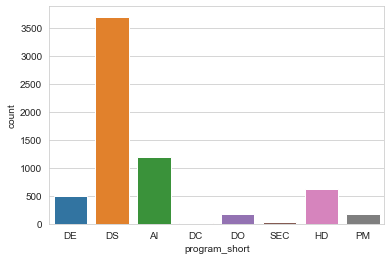

In [3]:
# how many applicants per session?
sns.countplot(df['program_short'])

---

# Work on DE only

In [4]:
df_program = df[df.program_short == 'DE']
df_program = df_program.reset_index(drop=True)

df_program.head()

,Unnamed: 0,hashed_application_id,hashed_candidate_id,linkedin_available,website_available,github_available,program_short,location_short,year,session,...,terraform,threat analys,version control,wireshark,PhD,preferred_study_area_DS,preferred_study_area_SEC,preferred_study_area_DC,preferred_study_area_DE,preferred_study_area_DO
0,0,e6257449bb6b2ecb86a042b896e38361,150f404526c29501a371238154700e6d,1,0,0,DE,SV,2019,B,...,0.0,0.0,0.0,0.0,0,1,1,1,1,0
1,3,510845ec68d29fd85d5a62d8bf2ecfe3,36c0205f303e4744ab54464830b3ae11,1,0,0,DE,SV,2019,B,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,9,f2dc478a2edf15ec850cc25d96c19759,f5372d95e242d50a6cf4b8a550e347a1,1,0,1,DE,SV,2019,A,...,0.0,0.0,0.0,0.0,0,1,1,1,1,0
3,11,4a381e3a5928598cb427fca338593f84,2fd45ccbe84a612b05da311cafa53667,1,0,1,DE,BOS,2019,A,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,27,fe4ebdfa9d7e48263658cd00047bbcf2,235d06ca2f00d59bfa53968deb4c3f91,1,1,1,DE,SEA,2019,C,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0


In [5]:
len(df_program)

490

### What are the relevant features for DE
* length of responses to questions (esp. research, side projects)
* specialization: Computer Science, data science and analytics, computer engineering, software engineering
* programming languages: Java, Python, Scala, C, C++, C#, R, Perl, Ruby, Golang, Bash
* total number of relevant programming languages
* scalable systems


In [6]:
# extract all potentially relevant features (based on discussion with program directors - domain knowledge)

# start with potential response variables
df_program_columns = ['YesPlus_firm',
 'YesPlus_soft',
 'Offer',
 # sessions and locations
 'session__A',
 'session__B',
 'session__C',
 'location__BOS',
 'location__IDX',
 'location__LA',
 'location__NY',
 'location__SEA',
 'location__SV',
 'location__TO',

 # some basics
 'linkedin_available',
 'website_available',
 'github_available',
              
 # length of responses
 'research_description_char',
 'side_projects_char',
 'coursework_char',
 'industry_motivation_char',
 'toughest_challenge_char',
 'codebase_size_char',
                      
              
 # PhD and preferred study area
 'PhD',
 'preferred_study_area_DE',
                            
 # programming languages
 'PL_python',
 'PL_javascript',
 'PL_fortran',
 'PL_golang',
 'PL_cobol',
 'PL_java',
 'PL_wasm',
 'PL_matlab',
 'PL_solidity',
 'PL_scala',
 'PL_pytorch',
 'PL_perl',
 'PL_tensorflow',
 'PL_bash',
 'PL_sql',
 'PL_c#',
 'PL_c++',
 'PL_r',
 'PL_ruby',
 'PL_rust',
 'PL_all',
 
 # other keywords
 'linux',
 'aws',
 'github',
 'machine learning',
 'scalable systems',]

In [7]:
# create clean dataset to train DS model
df_program2 = df_program[df_program.columns & df_program_columns]
df_program2 = df_program2[df_program_columns]
df_program2.head()

,YesPlus_firm,YesPlus_soft,Offer,session__A,session__B,session__C,location__BOS,location__IDX,location__LA,location__NY,...,PL_c++,PL_r,PL_ruby,PL_rust,PL_all,linux,aws,github,machine learning,scalable systems
0,1,1,1.0,0,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.500,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.250,0.0,0.0,0.0,0.0,0.0
2,1,1,0.0,1,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.500,0.0,0.0,0.0,0.0,0.0
3,1,1,1.0,1,0,0,1,0,0,0,...,0.0,0.0,1.0,0.0,0.375,0.0,0.0,1.0,0.0,0.0
4,1,1,1.0,0,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.375,0.0,1.0,1.0,0.0,0.0


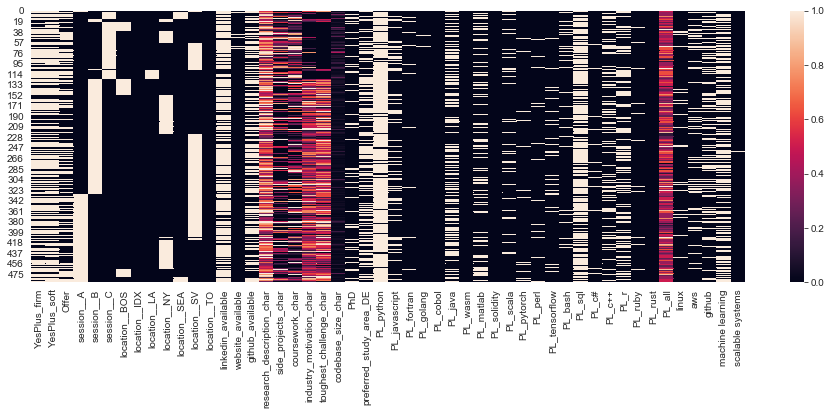

In [8]:
# check variables
plt.figure(figsize = (16,5))
sns.heatmap(df_program2)

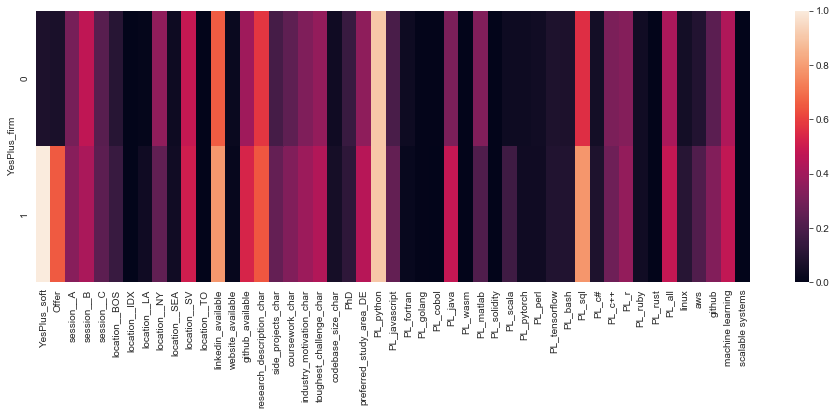

In [9]:
# examine which features have signal
plt.figure(figsize = (16,5))
sns.heatmap(df_program2.groupby('YesPlus_firm').mean())

# Logistic Regression
## 1. Full model with all potentially relevant features

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [11]:
X = df_program2[['session__A', 'session__B', 'session__C', 'location__BOS',
       'location__IDX', 'location__LA', 'location__NY', 'location__SEA',
       'location__SV', 'location__TO', 'linkedin_available',
       'website_available', 'github_available', 'research_description_char',
       'side_projects_char', 'coursework_char', 'industry_motivation_char',
       'toughest_challenge_char', 'codebase_size_char', 'PhD',
       'preferred_study_area_DE', 'PL_python', 'PL_javascript', 'PL_fortran',
       'PL_golang', 'PL_cobol', 'PL_java', 'PL_wasm', 'PL_matlab',
       'PL_solidity', 'PL_scala', 'PL_pytorch', 'PL_perl', 'PL_tensorflow',
       'PL_bash', 'PL_sql', 'PL_c#', 'PL_c++', 'PL_r', 'PL_ruby', 'PL_rust',
       'PL_all', 'linux', 'aws', 'github', 'machine learning',
       'scalable systems']]
y = df_program2['YesPlus_firm']
len(set(X))

47

              precision    recall  f1-score   support

           0       0.61      0.39      0.47        59
           1       0.67      0.83      0.74        88

    accuracy                           0.65       147
   macro avg       0.64      0.61      0.61       147
weighted avg       0.64      0.65      0.63       147

[[23 36]
 [15 73]]


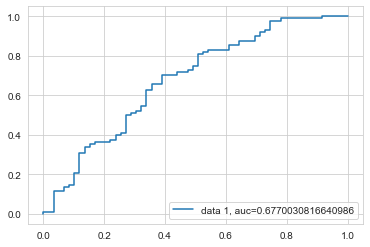

AUC: 0.68


In [12]:
## Logistic Regression Model


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

logmodel = LogisticRegression(solver='lbfgs', max_iter=2000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)


## Evaluation

print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

## plot ROC
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("AUC: " + str(round(auc, 2)))

Text(0.5, 0, 'Feature Importance')

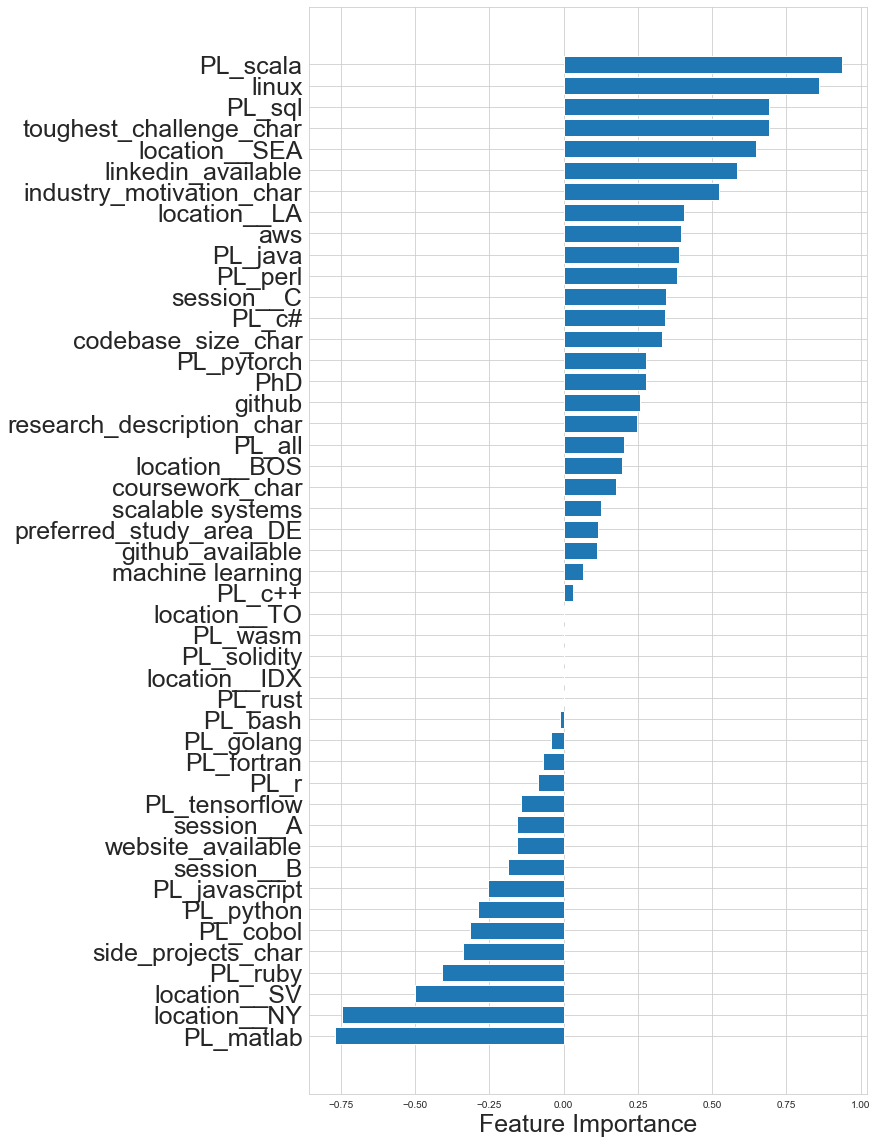

In [13]:
# examine  feature importance

from sklearn.datasets import make_classification

# get importance
feature_importance = logmodel.coef_[0]

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize = (10,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=25)
featax.set_xlabel('Feature Importance', fontsize=25)

## 2. Reduce model using univariate feature selection


              precision    recall  f1-score   support

           0       0.70      0.47      0.57        59
           1       0.71      0.86      0.78        88

    accuracy                           0.71       147
   macro avg       0.71      0.67      0.67       147
weighted avg       0.71      0.71      0.69       147

[[28 31]
 [12 76]]


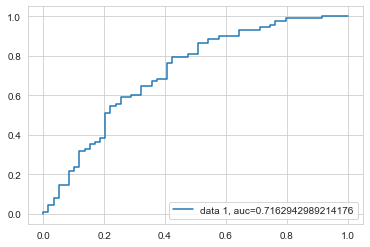

AUC: 0.72


In [14]:
## Univariate feature selection


# Create and fit selector
selector = SelectKBest(chi2, k=25)
selector.fit(X, y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
X_red = X.iloc[:,cols]

X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.3, random_state=99)

logmodel = LogisticRegression(solver='lbfgs', max_iter=2000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

## Evaluation
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

# we can reduce the model down to 23 variable without effects on metrics

## plot ROC
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

print("AUC: " + str(round(auc, 2)))

Text(0.5, 0, 'Feature Importance')

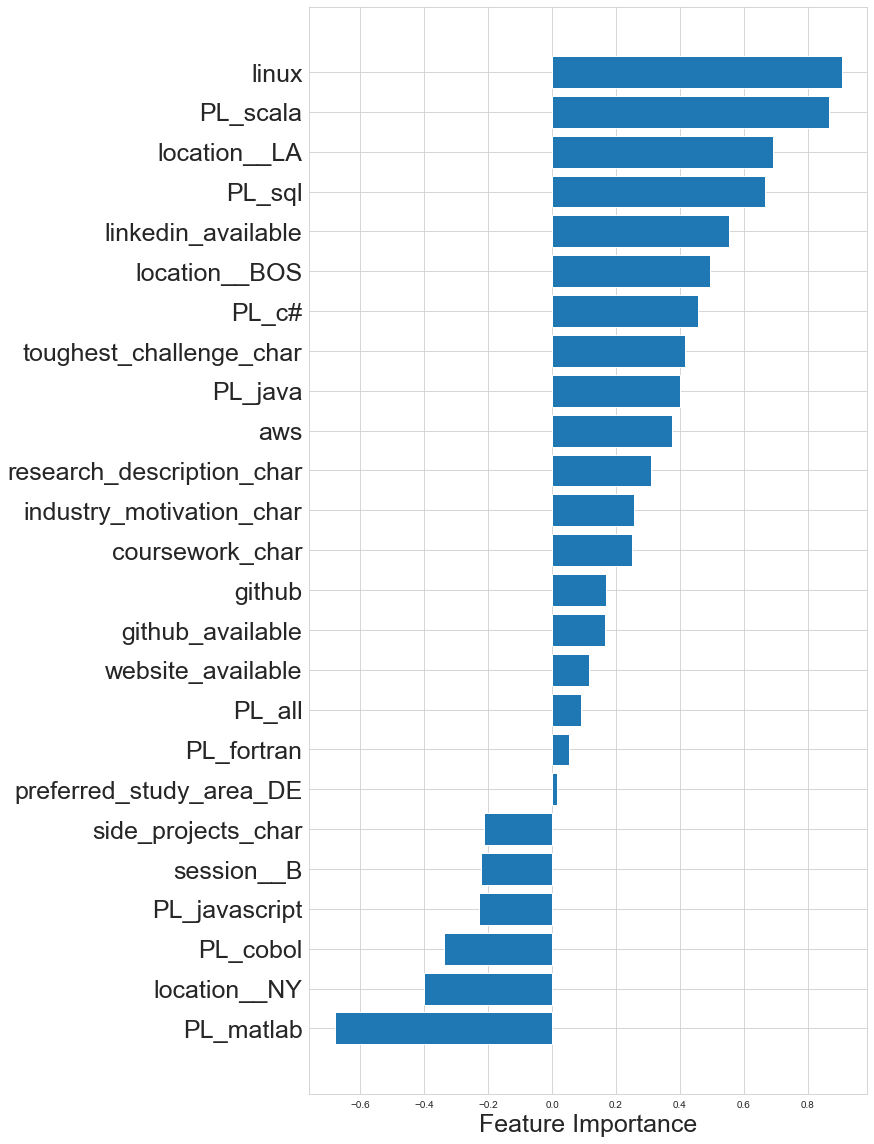

In [15]:
# examine  feature importance

feature_importance = logmodel.coef_[0]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize = (10,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_red.columns)[sorted_idx], fontsize=25)
featax.set_xlabel('Feature Importance', fontsize=25)

## 3. Final model: manually remove/add some features - based on domain knowledge

* I manually improved this model by removing features with negative effect (because it does not make sense that logistic and linear regressions should decrease an applicant's score) and adding known important features (e.g, python)
* I considered their importance as well as whether exclusion makes sense in terms of my knowledge of the domain

              precision    recall  f1-score   support

           0       0.70      0.44      0.54        59
           1       0.70      0.88      0.78        88

    accuracy                           0.70       147
   macro avg       0.70      0.66      0.66       147
weighted avg       0.70      0.70      0.68       147

[[26 33]
 [11 77]]


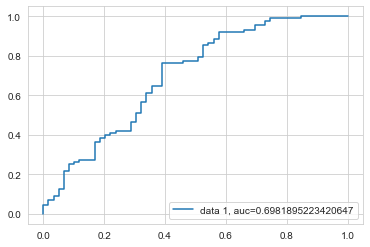

AUC: 0.7


In [16]:
X = df_program2[['industry_motivation_char', 'github',
       'coursework_char', 'research_description_char', 'PL_c#', 'aws',
       'PL_java', 'linkedin_available', 'PL_sql', 'linux', 'PL_scala']]
y = df_program2['YesPlus_firm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

logmodel = LogisticRegression(solver='lbfgs', max_iter=2000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

## Evaluation
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


## plot ROC
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("AUC: " + str(round(auc, 2)))

Text(0.5, 0, 'Feature Importance')

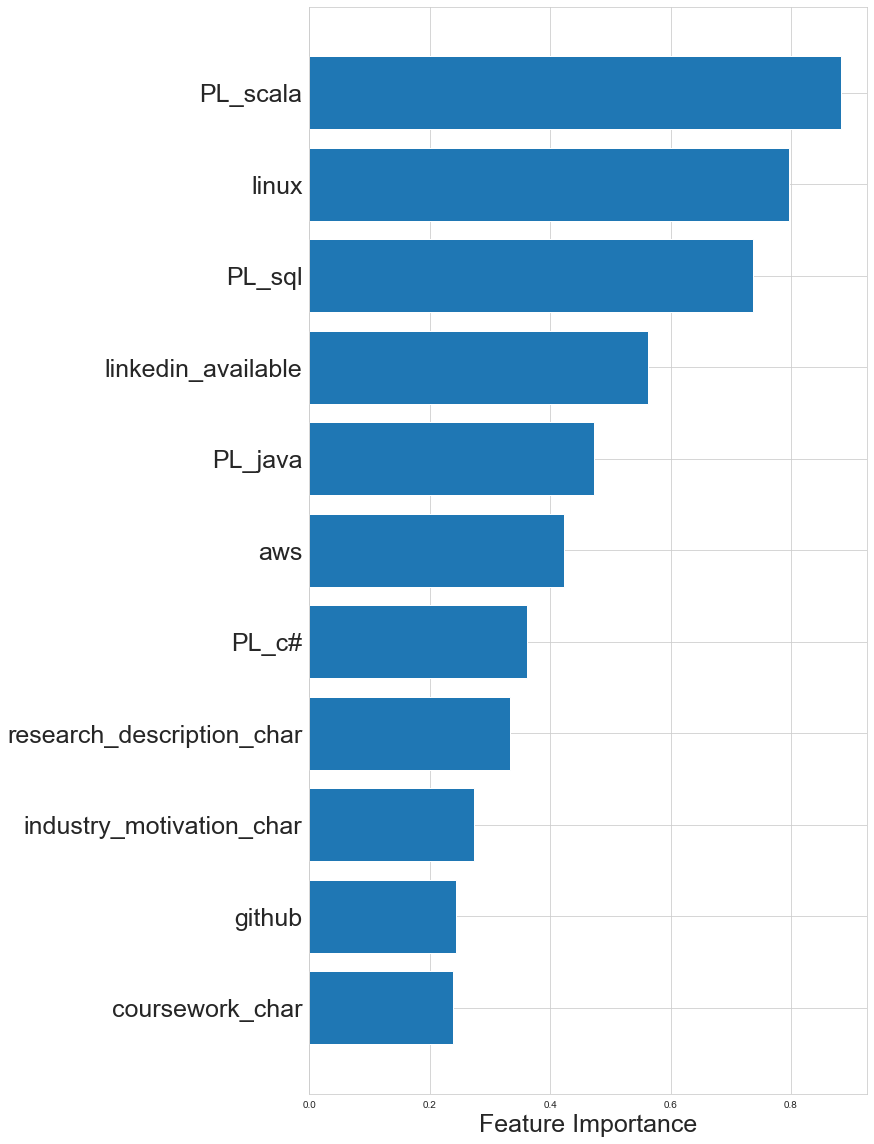

In [17]:
# examine  feature importance
sns.set_style('whitegrid')

feature_importance = logmodel.coef_[0]
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize = (10,20))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=25)
featax.set_xlabel('Feature Importance', fontsize=25)

In [21]:
# save featues in list to later extract relevant columns when making predictions

df_program_features = list((X.columns)[sorted_idx])
df_program_features.reverse()
print(df_program_features)

print('\n')
print ("Number of features in final model: ", len(np.array(X.columns)[sorted_idx]))

['PL_scala', 'linux', 'PL_sql', 'linkedin_available', 'PL_java', 'aws', 'PL_c#', 'research_description_char', 'industry_motivation_char', 'github', 'coursework_char']


Number of features in final model:  11


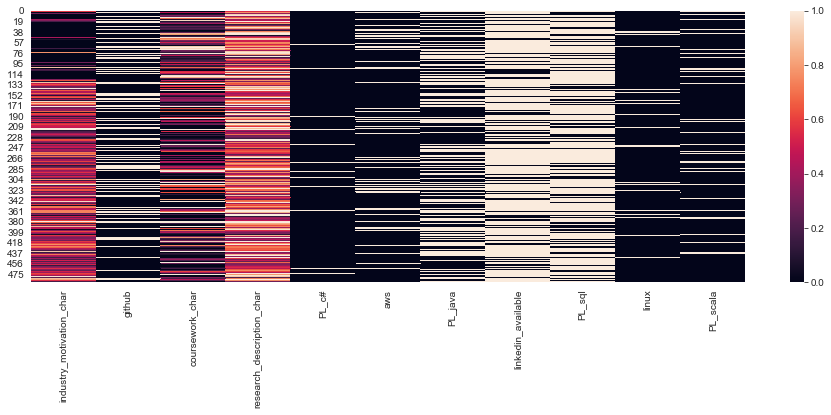

In [22]:
# visually examine features
plt.figure(figsize = (16,5))
sns.heatmap(X)
# great! everything is betw. 0 and 1

## Save the model

In [23]:
import pickle
#pickle.dump(logmodel, open('Models/DE_LGmodel.sav', 'wb'))

# save features to csv
#pd.DataFrame(X.columns, columns = ['features']).to_csv('Models/DE_features.csv')

# Validate model on Test Data using interactive plots
* the purpose of the model is to score applicants
* these scores can then be used to forward the best applications (with the highest scores) to the interview stage and thus speed up the process
* by moving the threshold that classifies applicants into the 'move forward' category, we can see how well the system works

In [24]:
# split again but keep other relevant variables (e.g., offer and location)
X = df_program[df_program_features]
y = df_program[['YesPlus_firm', 'Offer', 'location_short']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

# join test data y and X
test = pd.DataFrame(y_test).join(pd.DataFrame(X_test))

## predict model classification on test data set
test['LG_pred_05'] = logmodel.predict(X_test)

# predict probabilities (i.e., applicant score)
test['Applicant_score'] = list(logmodel.predict_proba(X_test)[:,1])

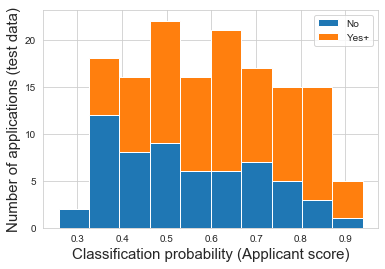

In [25]:
# compare score agaist who got an interview

sns.set_style('whitegrid')
# distribution of Data Science scores over all sections
offer = test['Applicant_score'][test['YesPlus_firm'] == 0]
reject = test['Applicant_score'][test['YesPlus_firm'] == 1]
x = [offer, reject]
label = ['No', 'Yes+']

plt.hist(x, stacked = True, label=label, bins=10)
plt.legend(loc="upper right")
plt.xlabel('Classification probability (Applicant score)', size=15)
plt.ylabel('Number of applications (test data)', size=15)
plt.show()


### Make interactive plots to illustrate what happens when we move the threshold for classification

In [26]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

import statistics

In [27]:
# 1. create function which will find unique values, sort them and then add the ALL item at the start

ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique
# the next cell comes next (same project)

In [28]:
# 2. Interactive plotting - INTERVIEW - add histogram to plot and remove scatterplot

# What threshold is best to maximize the percentage of applications that will get an offer?

output_loc = widgets.Output()
plot_output = widgets.Output()


# initiate dropdown
dropdown_loc = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_program.location_short),
                               description = "Location")
slider = widgets.FloatSlider(value = 0.5, min = 0.1, max = 0.9, 
                    step=0.05, description = "Threshold",
                   orientation = 'horizontal')

output_loc.clear_output()
plot_output.clear_output()

# create observer handler to filter dataframe by location
# input argument of the handler, 'change', contains info about the changes that took place
# allows us to access the 'new' value (change.new)

def common(location, thresh):
    
    
    with plot_output:
        plot_output.clear_output()   ### VERY VERY IMPORTANT TO PUT THIS LINE EXACTLY HERE!!!!!
        if (location == ALL):
            data_new = test
        else:
            data_new = test[test.location_short == location].copy()
        
        
        # distribution of Data Science scores over all sections
        plt.figure(figsize = (6,3))
        interview = data_new['Applicant_score'][data_new['YesPlus_firm'] == 0]
        reject = data_new['Applicant_score'][data_new['YesPlus_firm'] == 1]
        x = [interview, reject]
        label = ['No', 'Yes+']

        plt.hist(x, stacked = True, label=label, bins=8)
        plt.axvline(thresh, color='black', linewidth = 3)
        plt.legend(loc="upper right")
        plt.xlabel('Applicant Score', size=12)
        plt.ylabel('Number of applications (test data)', size=12)
        
        
        # plot Applicant score vs. Interview

        # create predictions for threshold (slider)
        data_new['LG_pred'] = 0
        data_new.loc[data_new['Applicant_score'] >= thresh, 'LG_pred'] = 1

        barplot = data_new.groupby(['YesPlus_firm', 'LG_pred']).size().reset_index().pivot(columns='YesPlus_firm', index='LG_pred', values=0)
        barplot.plot(kind='bar', stacked=True, figsize = (6,4))
        plt.title('Threshold: ' + str(thresh))
        plt.xlabel('Model Classification', size=12)
        plt.xticks([0,1], ['No', 'Yes+'], rotation=0)
        plt.ylabel('Number of applications (test data)', size=12)
        plt.legend(['No', 'Yes+'])
        show_inline_matplotlib_plots()
        
        
        
    with output_loc:
        output_loc.clear_output()
        
        print("An ApplicantScore cut-off of " + str(thresh) + " will achieve the following:")
        
        # Print total applications that were eliminated
        print('Fast-tracked applications to Interview: ' + str(round(statistics.mean(list(data_new['LG_pred']))*100)) + "%")

        # Print precision
        true_pos = sum(list(data_new['LG_pred'][data_new['YesPlus_firm'] == 1]))
        false_pos = sum(list(data_new['LG_pred'][data_new['YesPlus_firm'] == 0]))
        print("Precision: " + str(round(true_pos / (true_pos + false_pos) * 100)) + "%")
        
        # Print recall
        false_negs = sum(list(data_new['YesPlus_firm'])) - true_pos
        print("Recall: " + str(round(true_pos / (true_pos + false_negs) * 100)) + "%")
    
    
        
def dropdown_loc_eventhandler(change):
    common(change.new, slider.value)
     
def slider_eventhandler(change):
    common(dropdown_loc.value, change.new)
      
dropdown_loc.observe(dropdown_loc_eventhandler, names='value')
slider.observe(slider_eventhandler, names='value')

print("Please choose a location (or choose ALL for all locations)")
display(dropdown_loc)
print('\n')
print("Please move the ApplicantScore threshold slider one step at a time")
display(slider)
display(output_loc)
display(plot_output)

Please choose a location (or choose ALL for all locations)


Dropdown(description='Location', options=('ALL', 'BOS', 'LA', 'NY', 'SEA', 'SV'), value='ALL')



Please move the ApplicantScore threshold slider one step at a time


FloatSlider(value=0.5, description='Threshold', max=0.9, min=0.1, step=0.05)

Output()

Output()

# Applicant Score Sheet
* what are the features displayed by applicants

In [29]:
# extract columns with applicant info
df_program_Score_Sheet = df[['hashed_application_id', 'hashed_candidate_id', 'plys_string']]

# extract columns with relevant applicant features
df_program_applicant_feats = df[df_program_features]



# supress chained assignement warning
pd.options.mode.chained_assignment = None  # default='warn'

df_program_applicant_feats2 = df_program_applicant_feats.fillna(0)

# add score
df_program_Score_Sheet['df_program_score'] = logmodel.predict_proba(df_program_applicant_feats2)[:,1]

# join with score sheet
df_program_Score_Sheet = df_program_Score_Sheet.join(df_program_applicant_feats)

df_program_Score_Sheet.head()

,hashed_application_id,hashed_candidate_id,plys_string,df_program_score,PL_scala,linux,PL_sql,linkedin_available,PL_java,aws,PL_c#,research_description_char,industry_motivation_char,github,coursework_char
0,e6257449bb6b2ecb86a042b896e38361,150f404526c29501a371238154700e6d,DE.SV-19B,0.747430,0.0,0.0,1.0,1,0.0,0.0,1.0,1.000,1.000,0.0,0.000
1,fd8eb1133a75d9c0b334f6899cd228b9,f2b1a8bd28c2391224c002b9c80f6143,DS.TO-19C,0.347311,0.0,0.0,1.0,0,0.0,0.0,0.0,0.693,0.000,0.0,0.000
2,1d270c12d25615282e555adb23006cc5,f8078d8d9e3259d417b4c133fda72ab5,AI.NY-19A,0.631955,0.0,0.0,0.0,1,0.0,0.0,0.0,0.978,0.100,1.0,0.051
3,510845ec68d29fd85d5a62d8bf2ecfe3,36c0205f303e4744ab54464830b3ae11,DE.SV-19B,0.535077,0.0,0.0,1.0,1,1.0,0.0,0.0,0.311,0.261,0.0,0.112
4,18039f4fd215bfab0c6161b3094b623c,6ca10dafb8206133608a6f67a23744f4,DS.TO-19C,0.645915,0.0,0.0,1.0,0,0.0,0.0,1.0,0.531,0.000,0.0,0.964


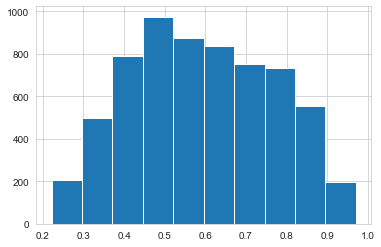

In [30]:
# distribution of Data Science scores over all sections
df_program_Score_Sheet['df_program_score'].hist()